Example notebook showing how to use the MCMC sampler (currently in development)

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import emcee
import corner

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import MCMCSampler
from nnest.likelihoods import *
from nnest.priors import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood
#like = Himmelblau(2)
#prior = UniformPrior(2, -5, 5)
#like = Rosenbrock(2)
#prior = UniformPrior(2, -2, 5)
#like = Gaussian(2, 0.9)
#prior = UniformPrior(2, -5, 5)
#like = Eggbox(2)
#prior = UniformPrior(2, -15, 15)
like = GaussianShell(2)
prior = UniformPrior(2, -3, 3)
#like = GaussianMix(2)
#prior = UniformPrior(2, -8, 8)
#like = DoubleGaussianShell(2, centers=[[-4.0, 0.0], [4.0, 0.0]])
#prior = UniformPrior(2, [-7, -3], [7, 3])

In [6]:
def transformed_loglike(x):
    return like(x) + prior(x)

In [7]:
num_walkers = 100

In [8]:
sampler = emcee.EnsembleSampler(num_walkers, like.x_dim, transformed_loglike)

In [9]:
state = prior.sample(num_walkers)

In [10]:
for i in range(10):
    state = sampler.run_mcmc(state, 1)
    if i % 10 == 0:
        print(i, np.mean(sampler.acceptance_fraction))

0 0.32


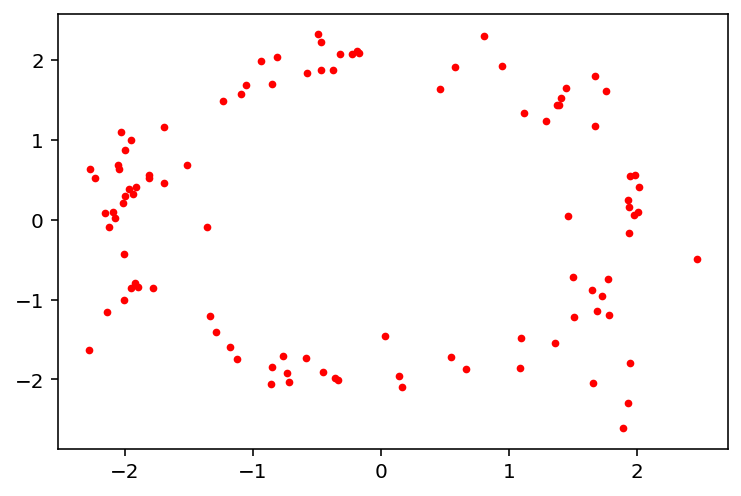

In [11]:
plt.scatter(state.coords[:,0], state.coords[:,1], s=8, color='r')
plt.show()

In [12]:
sampler = MCMCSampler(like.x_dim, like, hidden_dim=16, num_blocks=3, flow='spline', prior=prior)

Creating directory for new run logs/test/run20
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [13]:
sampler.run(100, init_samples=state.coords, num_walkers=num_walkers, bootstrap_iters=1)

[nnest.trainer] [INFO] Number of training samples [100]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0328] validation loss [0.3418]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0280] validation loss [0.2915]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0249] validation loss [0.2729]
[nnest.trainer] [INFO] Epoch [300] train loss [0.0224] validation loss [0.2613]
[nnest.trainer] [INFO] Epoch [400] train loss [0.0201] validation loss [0.2464]
[nnest.trainer] [INFO] Epoch [500] train loss [0.0181] validation loss [0.2304]
[nnest.trainer] [INFO] Epoch [600] train loss [0.0169] validation loss [0.2266]
[nnest.trainer] [INFO] Epoch [618] ran out of patience
[nnest.trainer] [INFO] Best epoch [568] validation loss [0.2257]
[nnest.sampler] [INFO] Step [1] acceptance [0.5500] ncalls [100]


/Users/adammoss/opt/anaconda3/envs/nnest/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


[nnest.sampler] [INFO] Step [2] acceptance [0.5450] ncalls [200]
[nnest.sampler] [INFO] Step [3] acceptance [0.5233] ncalls [300]
[nnest.sampler] [INFO] Step [4] acceptance [0.5075] ncalls [400]
[nnest.sampler] [INFO] Step [5] acceptance [0.4740] ncalls [500]
[nnest.sampler] [INFO] Step [6] acceptance [0.4750] ncalls [600]
[nnest.sampler] [INFO] Step [7] acceptance [0.4700] ncalls [700]
[nnest.sampler] [INFO] Step [8] acceptance [0.4662] ncalls [800]
[nnest.sampler] [INFO] Step [9] acceptance [0.4711] ncalls [900]
[nnest.sampler] [INFO] Step [10] acceptance [0.4580] ncalls [1000]
[nnest.sampler] [INFO] Step [11] acceptance [0.4545] ncalls [1100]
[nnest.sampler] [INFO] Step [12] acceptance [0.4492] ncalls [1200]
[nnest.sampler] [INFO] Step [13] acceptance [0.4508] ncalls [1300]
[nnest.sampler] [INFO] Step [14] acceptance [0.4479] ncalls [1400]
[nnest.sampler] [INFO] Step [15] acceptance [0.4480] ncalls [1500]
[nnest.sampler] [INFO] Step [16] acceptance [0.4412] ncalls [1600]
[nnest.samp

[nnest.sampler] [INFO] Step [89] acceptance [0.2055] ncalls [8900]
[nnest.sampler] [INFO] Step [90] acceptance [0.2048] ncalls [9000]
[nnest.sampler] [INFO] Step [91] acceptance [0.2042] ncalls [9100]
[nnest.sampler] [INFO] Step [92] acceptance [0.2038] ncalls [9200]
[nnest.sampler] [INFO] Step [93] acceptance [0.2033] ncalls [9300]
[nnest.sampler] [INFO] Step [94] acceptance [0.2031] ncalls [9400]
[nnest.sampler] [INFO] Step [95] acceptance [0.2025] ncalls [9500]
[nnest.sampler] [INFO] Step [96] acceptance [0.2020] ncalls [9600]
[nnest.sampler] [INFO] Step [97] acceptance [0.2015] ncalls [9700]
[nnest.sampler] [INFO] Step [98] acceptance [0.2007] ncalls [9800]
[nnest.sampler] [INFO] Step [99] acceptance [0.2008] ncalls [9900]
[nnest.sampler] [INFO] Step [100] acceptance [0.2003] ncalls [10000]
[nnest.sampler] [INFO] ncall: 10000



In [14]:
like.num_evaluations

9046

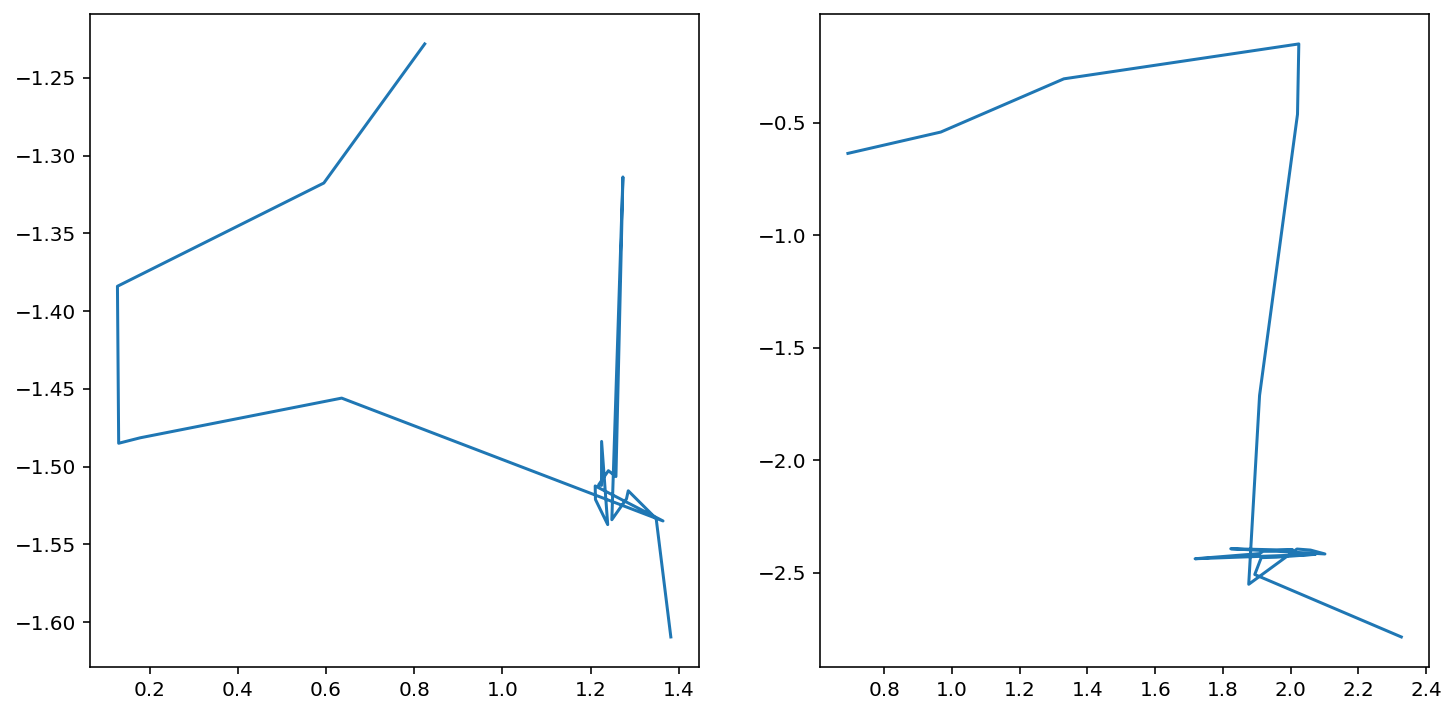

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(sampler.samples[0,:,0], sampler.samples[0,:,1])
ax[1].plot(sampler.latent_samples[0,:,0], sampler.latent_samples[0,:,1])
plt.show()

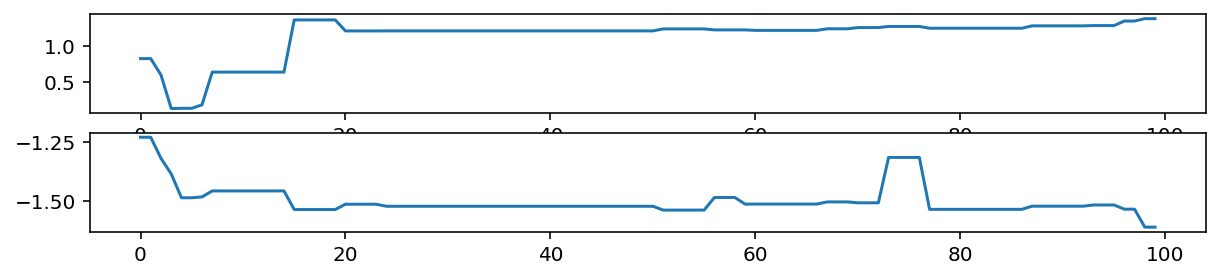

In [16]:
fig, ax = plt.subplots(like.x_dim, 1, figsize=(10, like.x_dim))
for i in range(like.x_dim):
    ax[i].plot(sampler.samples[0,:,i])
plt.show()

In [17]:
flat_samples = sampler.samples.reshape((-1, sampler.samples.shape[2]))

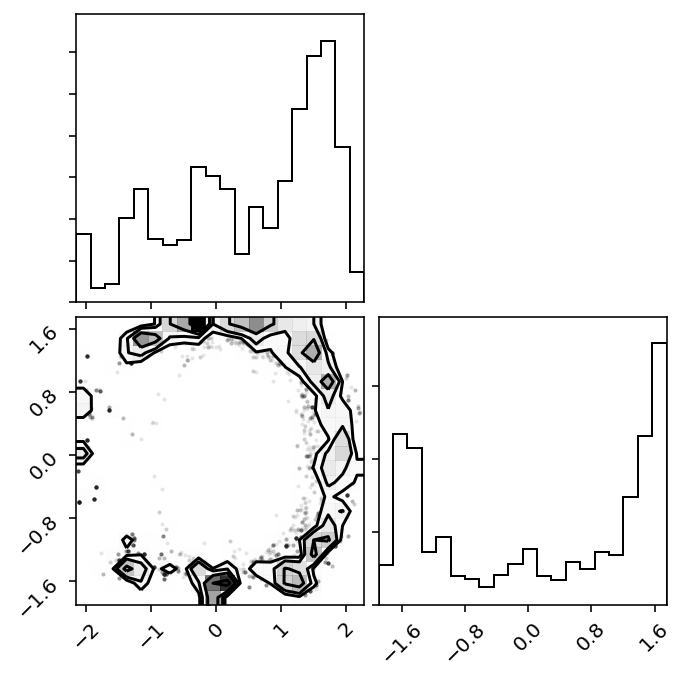

In [18]:
fig = corner.corner(flat_samples)

In [19]:
mc = MCSamples(samples=[sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])], 
               loglikes=[-sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])])

Removed no burn in


In [20]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.getConvergeTests())

112.36941761925183
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      5.3629681E-01  1.1681281E+00 -1.1902657E+00  2.0392667E+00  two   -1.6376374E+00  2.1804473E+00  two   -2.1864393E+00  2.2672003E+00  two     p_{1}
param2      1.4402060E-01  1.3137613E+00 -1.7896623E+00  1.7975119E+00  two   -1.8473684E+00  1.8384139E+00  two   -1.8655322E+00  1.8514102E+00  two     p_{2}

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

            Weight Length   Sample length           N_eff
param1           1.07E-01            0.11           93324
param2           1.09E-01            0.11           91920


mean convergence stats using remaining chains
param sqrt(var(chain mean)/mean(chain var))

param1        2.9011  p_{1}
param2        2.8766  p_{2}

var(mean)/mean(var) for eigenvalues of covari

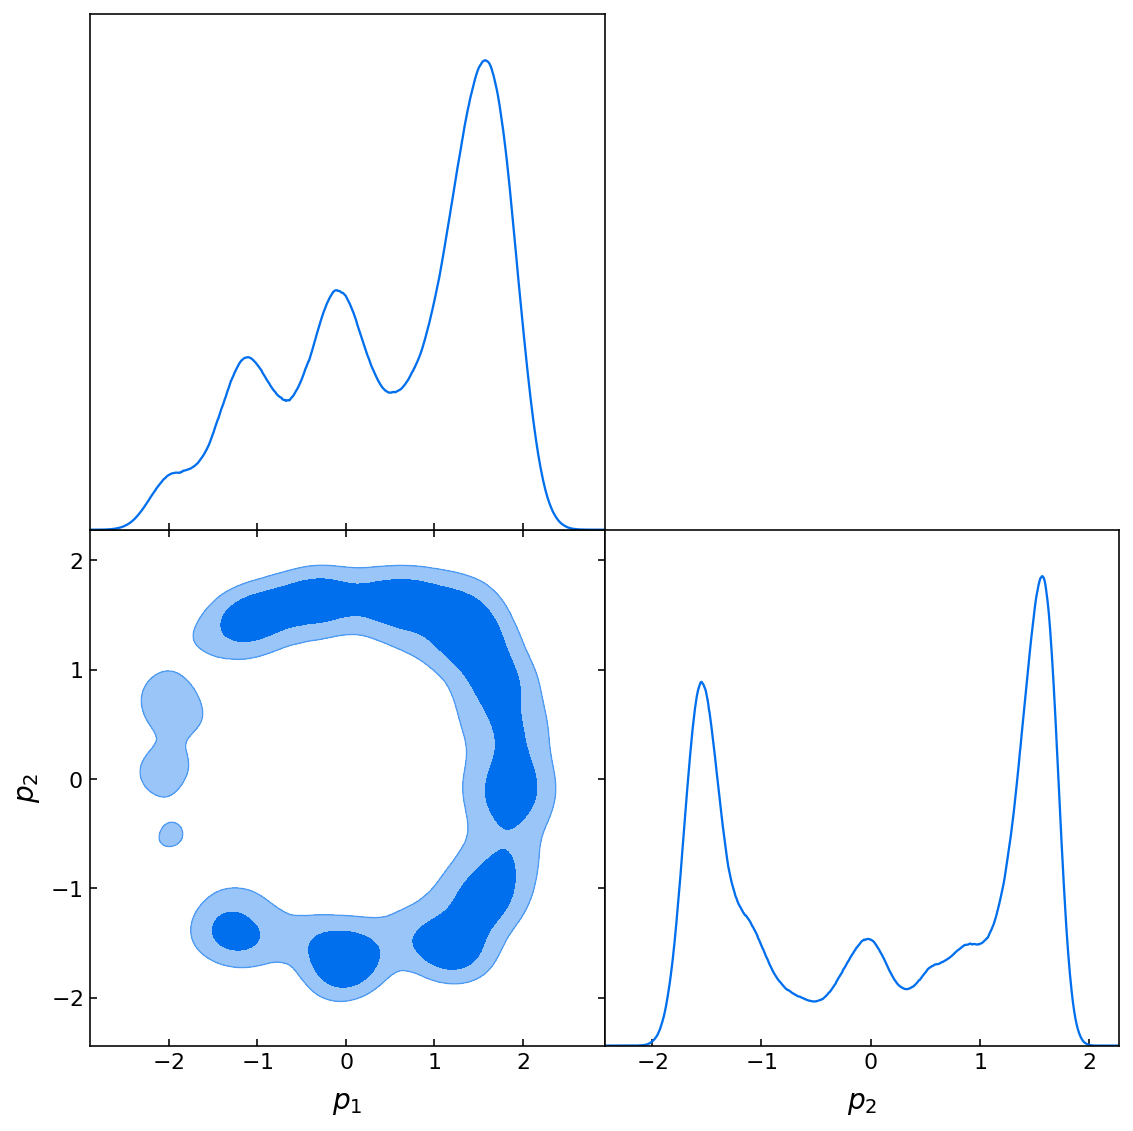

In [21]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)